In [1]:
b = 8

In [2]:
a[2]

NameError: name 'a' is not defined

In [15]:
import random

random.seed('Hola')
print (random.random())
print (random.random())

41.08141408001964

In [30]:
opciones = ['opcion 1', 'opcion 2']

# Quiero que el 70% de la veces me de opcion 1

if random.random()<0.7:
    print (opciones[0])
else:
    print (opciones[1])

opcion 1


In [48]:
import numpy as np

def contar_n_muestras(tamano_muestra, opciones=['par','impar'], buscado='par'):
    resultado = np.random.choice(opciones,tamano_muestra)
    coincidencias = resultado == buscado
    return coincidencias.sum()



In [60]:
contar_n_muestras(4)

1

In [62]:
def hacer_n_experimentos(numero_experimentos,tamano_muestra):
    resultado = []
    for i in range(numero_experimentos):
        experimento = contar_n_muestras(tamano_muestra)
        resultado.append(experimento)
    return resultado

In [85]:
exp = hacer_n_experimentos(1000,4)

[0 1 2 3 4] [ 73 243 358 261  65]


c:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

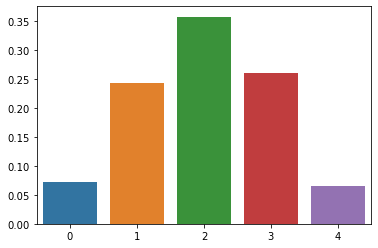

In [86]:
import seaborn as sns

unique, counts = np.unique(exp, return_counts=True)
print (unique, counts)
sns.barplot(unique, counts/counts.sum())

In [87]:
largos = [15.2, 14.8, 13.7, 14.7, 13.8, 14.5, 14.4, 14.5, 14.7, 14.35, 14.57, 17.3, 14.7, 16.58, 14, 13.7, 13.6, 13.7, 14.6, 13.9, 15.6, 14.9, 17.1, 14.4, 14.4, 14.3, 14.6, 14.2]

In [88]:
np.mean(largos)

14.671428571428573

c:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

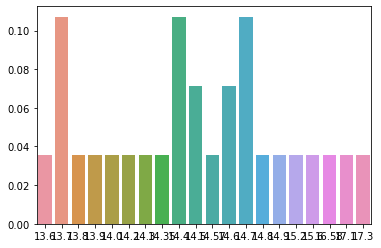

In [89]:
data = np.array(largos)
#print (data)
unique, counts = np.unique(data, return_counts=True)
sns.barplot(unique, counts/counts.sum())

c:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


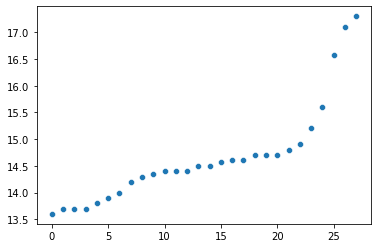

In [90]:
data.sort()
#print(data)
x = np.arange(len(data))
#print (x)
grafico = sns.scatterplot(x,data)

La probabilidad de que el valor este entre 12 y 18 es 100.0%


c:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


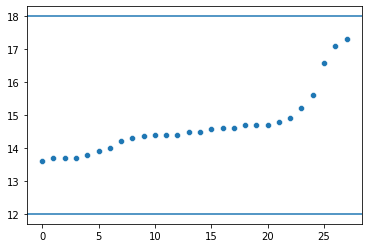

In [104]:
# Cual es la probabilidad de que un lapiz mida entre 14 y 15 cm

cota_sup = 18
cota_inf = 12

condicion = (cota_inf < data) & (data <= cota_sup)
# La probabilidad son los caso favorables sobre los totales
print (f'La probabilidad de que el valor este entre {cota_inf} y {cota_sup} es {condicion.sum()/len(condicion)*100}%')
grafico = sns.scatterplot(x,data)
grafico.axhline(cota_sup)
grafico.axhline(cota_inf)

c:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


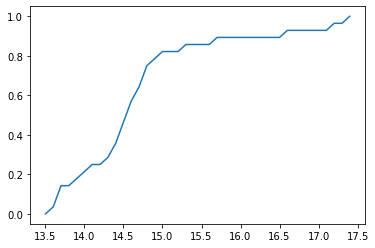

In [105]:
# Vamos a contruir la probabilidad acumulada
paso = 0.1

probabilidad_acumulada = []
limite_inf = data.min()-paso

for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (limite_inf < data) & (data <= deslizador)
    probabilidad_acumulada.append(condicion.sum()/len(condicion))
    
grafico = sns.lineplot(np.arange(data.min()-paso,data.max()+paso,paso),probabilidad_acumulada)

c:\Users\Ionatan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


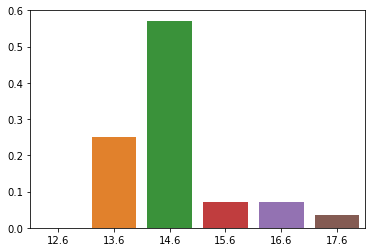

In [108]:
# Vamos a construir la densidad de probabilidad
paso = 1

densidad_probabilidad = []
for deslizador in np.arange(data.min()-paso,data.max()+paso,paso):
    condicion = (deslizador - paso/2 < data) & (data <= deslizador + paso/2)
    densidad_probabilidad.append(condicion.sum()/len(condicion)) 
    
grafico = sns.barplot(np.arange(data.min()-paso,data.max()+paso,paso),densidad_probabilidad)